In [ ]:
!pip install biopython


     |████████████████████████████████| 2.3 MB 14.5 MB/s 


In [ ]:
from Bio import SeqIO
from Bio.SeqUtils import GC

# PREGUNTA 4

In [ ]:
record = SeqIO.read("NC_005816.fna", "fasta")
table = 11
min_pro_len = 100


def find_orfs_with_trans(seq, trans_table, min_protein_length):
    answer = []
    seq_len = len(seq)
    for strand, nuc in [(+1, seq), (-1, seq.reverse_complement())]:
        for frame in range(3):
            trans = nuc[frame:].translate(trans_table)
            trans_len = len(trans)
            aa_start = 0
            aa_end = 0
            while aa_start < trans_len:
                aa_end = trans.find("*", aa_start)
                if aa_end == -1:
                    aa_end = trans_len
                if aa_end - aa_start >= min_protein_length:
                    if strand == 1:
                        start = frame + aa_start * 3
                        end = min(seq_len, frame + aa_end * 3 + 3)
                    else:
                        start = seq_len - frame - aa_end * 3 - 3
                        end = seq_len - frame - aa_start * 3
                    answer.append((start, end, strand, trans[aa_start:aa_end]))
                aa_start = aa_end + 1
    answer.sort()
    return answer


orf_list = find_orfs_with_trans(record.seq, table, min_pro_len)
orf_list_with_GC_per  = dict()
for start, end, strand, pro in orf_list:
    percent = GC(pro)
    orf_list_with_GC_per[pro]=percent
    print(
        "%s...%s - length %i, strand %i, %i:%i"
        % (pro[:30], pro[-3:], len(pro), strand, start, end)
    )


NQIQGVICSPDSGEFMVTFETVMEIKILHK...GVA - length 355, strand 1, 41:1109
WDVKTVTGVLHHPFHLTFSLCPEGATQSGR...VKR - length 111, strand -1, 491:827
KSGELRQTPPASSTLHLRLILQRSGVMMEL...NPE - length 285, strand 1, 1030:1888
RALTGLSAPGIRSQTSCDRLRELRYVPVSL...PLQ - length 119, strand -1, 2830:3190
RRKEHVSKKRRPQKRPRRRRFFHRLRPPDE...PTR - length 128, strand 1, 3470:3857
GLNCSFFSICNWKFIDYINRLFQIIYLCKN...YYH - length 176, strand 1, 4249:4780
RGIFMSDTMVVNGSGGVPAFLFSGSTLSSY...LLK - length 361, strand -1, 4814:5900
VKKILYIKALFLCTVIKLRRFIFSVNNMKF...DLP - length 165, strand 1, 5923:6421
LSHTVTDFTDQMAQVGLCQCVNVFLDEVTG...KAA - length 107, strand -1, 5974:6298
GCLMKKSSIVATIITILSGSANAASSQLIP...YRF - length 315, strand 1, 6654:7602
IYSTSEHTGEQVMRTLDEVIASRSPESQTR...FHV - length 111, strand -1, 7788:8124
WGKLQVIGLSMWMVLFSQRFDDWLNEQEDA...ESK - length 125, strand -1, 8087:8465
TGKQNSCQMSAIWQLRQNTATKTRQNRARI...AIK - length 100, strand 1, 8741:9044
QGSGYAFPHASILSGIAMSHFYFLVLHAVK...CSD - length 114, strand -1, 9264:9609


/usr/local/lib/python3.7/dist-packages/Bio/Seq.py:2983: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [ ]:
from operator import itemgetter
porcentajes = sorted(orf_list_with_GC_per.items(), key=itemgetter(1))

Orf Con porcentaje de G+C mas bajo

In [ ]:
for i in range(3):
  print(porcentajes[i])

(Seq('WGKLQVIGLSMWMVLFSQRFDDWLNEQEDALQEKVLADLKKLQVYGPELPRPYA...ESK'), 10.4)
(Seq('NQIQGVICSPDSGEFMVTFETVMEIKILHKQGMSSRAIARELGISRNTVKRYLQ...GVA'), 11.830985915492958)
(Seq('KSGELRQTPPASSTLHLRLILQRSGVMMELQHQRLMALAGQLQLESLISAAPAL...NPE'), 12.280701754385966)


ORF con porcentaje de G+C mas alto

In [ ]:
for i in range(3):
  print(porcentajes[-i-1])

(Seq('RALTGLSAPGIRSQTSCDRLRELRYVPVSLSASKRAWMLFWSSSASSCSRSHMA...PLQ'), 32.773109243697476)
(Seq('GCLMKKSSIVATIITILSGSANAASSQLIPNISPDSFTVAASTGMLSGKSHEML...YRF'), 20.317460317460316)
(Seq('QGSGYAFPHASILSGIAMSHFYFLVLHAVKQGFIFGDAKVRTRHINHRFSPYHT...CSD'), 18.42105263157895)


# Pregunta 5

In [ ]:
import random

sequence = SeqIO.read("plasmido.fna", "fasta")
seq_string = sequence.seq
original_seq_list = list(seq_string)
random_seq_list = original_seq_list.copy()
random.shuffle(random_seq_list)

In [ ]:
print(sequence)

ID: gi|10955253|ref|NC_002119.1|
Name: gi|10955253|ref|NC_002119.1|
Description: gi|10955253|ref|NC_002119.1| Escherichia coli plasmid CloDF13, complete sequence
Number of features: 0
Seq('AACGTAAAATGTTCAGCGAAAAACCGACATGGTTCACCTATCCTGATAATTGAT...GTT')


In [ ]:
print(original_seq_list)

['A', 'A', 'C', 'G', 'T', 'A', 'A', 'A', 'A', 'T', 'G', 'T', 'T', 'C', 'A', 'G', 'C', 'G', 'A', 'A', 'A', 'A', 'A', 'C', 'C', 'G', 'A', 'C', 'A', 'T', 'G', 'G', 'T', 'T', 'C', 'A', 'C', 'C', 'T', 'A', 'T', 'C', 'C', 'T', 'G', 'A', 'T', 'A', 'A', 'T', 'T', 'G', 'A', 'T', 'C', 'G', 'T', 'C', 'A', 'G', 'G', 'C', 'A', 'A', 'T', 'A', 'G', 'A', 'A', 'A', 'G', 'A', 'C', 'G', 'T', 'A', 'A', 'T', 'C', 'A', 'G', 'G', 'G', 'G', 'A', 'C', 'A', 'A', 'T', 'A', 'T', 'C', 'C', 'C', 'A', 'C', 'A', 'T', 'C', 'A', 'G', 'C', 'G', 'C', 'G', 'T', 'C', 'C', 'G', 'G', 'T', 'G', 'A', 'C', 'C', 'G', 'T', 'C', 'T', 'T', 'G', 'C', 'A', 'G', 'G', 'T', 'G', 'C', 'C', 'G', 'G', 'G', 'G', 'A', 'A', 'A', 'T', 'T', 'G', 'C', 'G', 'C', 'C', 'T', 'C', 'C', 'T', 'C', 'G', 'C', 'T', 'C', 'A', 'C', 'T', 'C', 'G', 'G', 'T', 'C', 'G', 'C', 'T', 'A', 'C', 'G', 'C', 'T', 'C', 'C', 'G', 'G', 'C', 'C', 'G', 'T', 'G', 'A', 'G', 'A', 'C', 'T', 'G', 'C', 'G', 'G', 'C', 'G', 'G', 'G', 'C', 'G', 'C', 'T', 'G', 'C', 'G', 'G', 'A', 'C',

In [ ]:
print(random_seq_list)

['G', 'C', 'T', 'A', 'G', 'G', 'C', 'C', 'G', 'A', 'G', 'C', 'A', 'C', 'C', 'T', 'A', 'C', 'G', 'G', 'G', 'T', 'T', 'G', 'T', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'A', 'A', 'C', 'G', 'C', 'A', 'C', 'G', 'C', 'C', 'A', 'C', 'G', 'T', 'G', 'C', 'G', 'G', 'A', 'A', 'C', 'G', 'T', 'T', 'C', 'A', 'T', 'A', 'G', 'T', 'A', 'T', 'C', 'C', 'T', 'C', 'A', 'C', 'G', 'C', 'G', 'T', 'C', 'C', 'T', 'C', 'G', 'A', 'C', 'C', 'C', 'C', 'C', 'A', 'C', 'G', 'A', 'C', 'C', 'G', 'A', 'C', 'C', 'C', 'G', 'C', 'G', 'T', 'C', 'C', 'C', 'A', 'G', 'T', 'A', 'G', 'C', 'C', 'T', 'G', 'A', 'G', 'G', 'A', 'C', 'C', 'G', 'C', 'T', 'T', 'C', 'G', 'G', 'G', 'G', 'G', 'G', 'C', 'A', 'C', 'C', 'T', 'T', 'C', 'G', 'T', 'T', 'G', 'A', 'T', 'T', 'T', 'C', 'G', 'G', 'C', 'C', 'A', 'A', 'C', 'C', 'T', 'A', 'G', 'T', 'C', 'G', 'G', 'T', 'G', 'A', 'T', 'C', 'G', 'C', 'A', 'T', 'T', 'C', 'C', 'C', 'A', 'T', 'G', 'C', 'A', 'A', 'A', 'C', 'T', 'C', 'T', 'C', 'C', 'T', 'C', 'C', 'T', 'C', 'G', 'T', 'A', 'C', 'C', 'T', 'A', 'G', 'C',

In [ ]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

random_seq = Seq("".join(random_seq_list))

my_random_seq = SeqRecord(Seq(random_seq), id = "randomsequence")

with open("random_plasmido.fasta", "w") as output_handle:
    SeqIO.write(my_random_seq, output_handle, "fasta")

Tras llevar ambos archivos a GeneMark, para la secuencia original se obtuvieron muchos mas resultados que para la alterada de forma aleatoria:
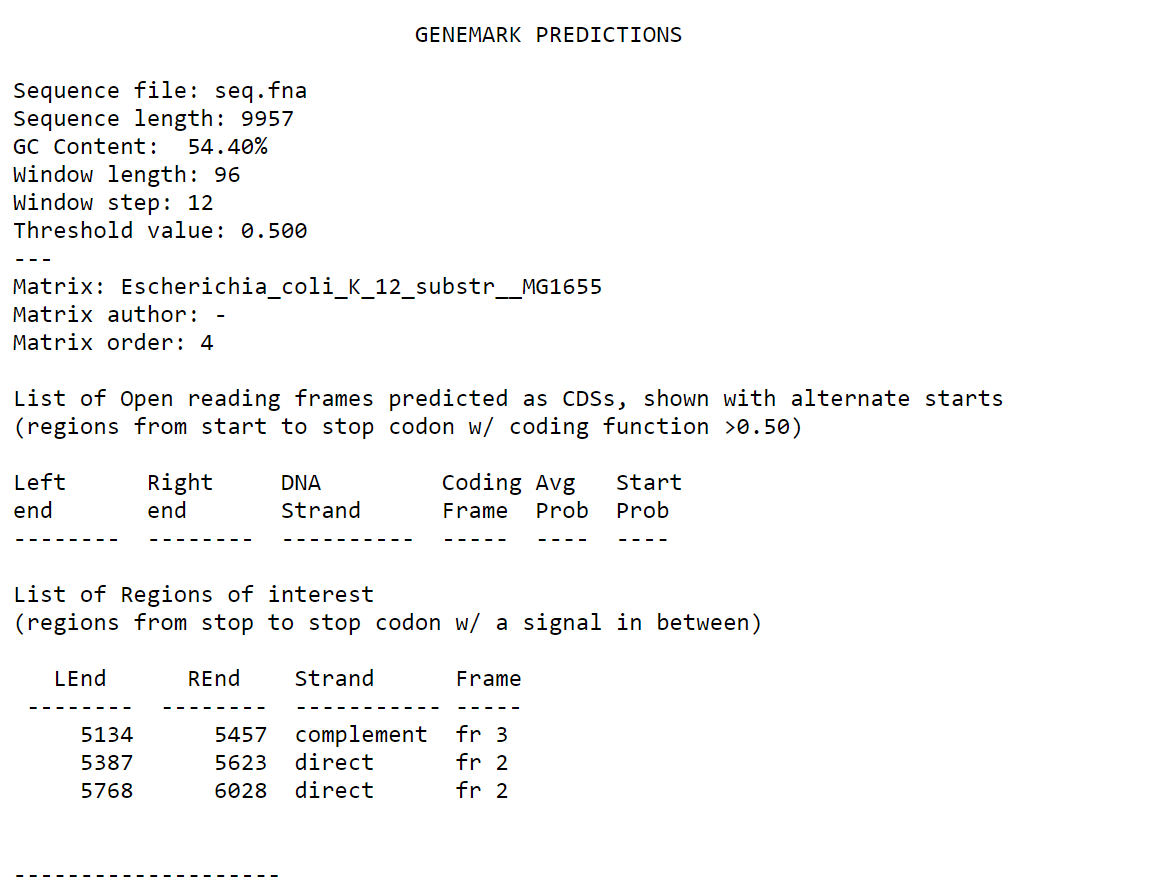

Resultados de la original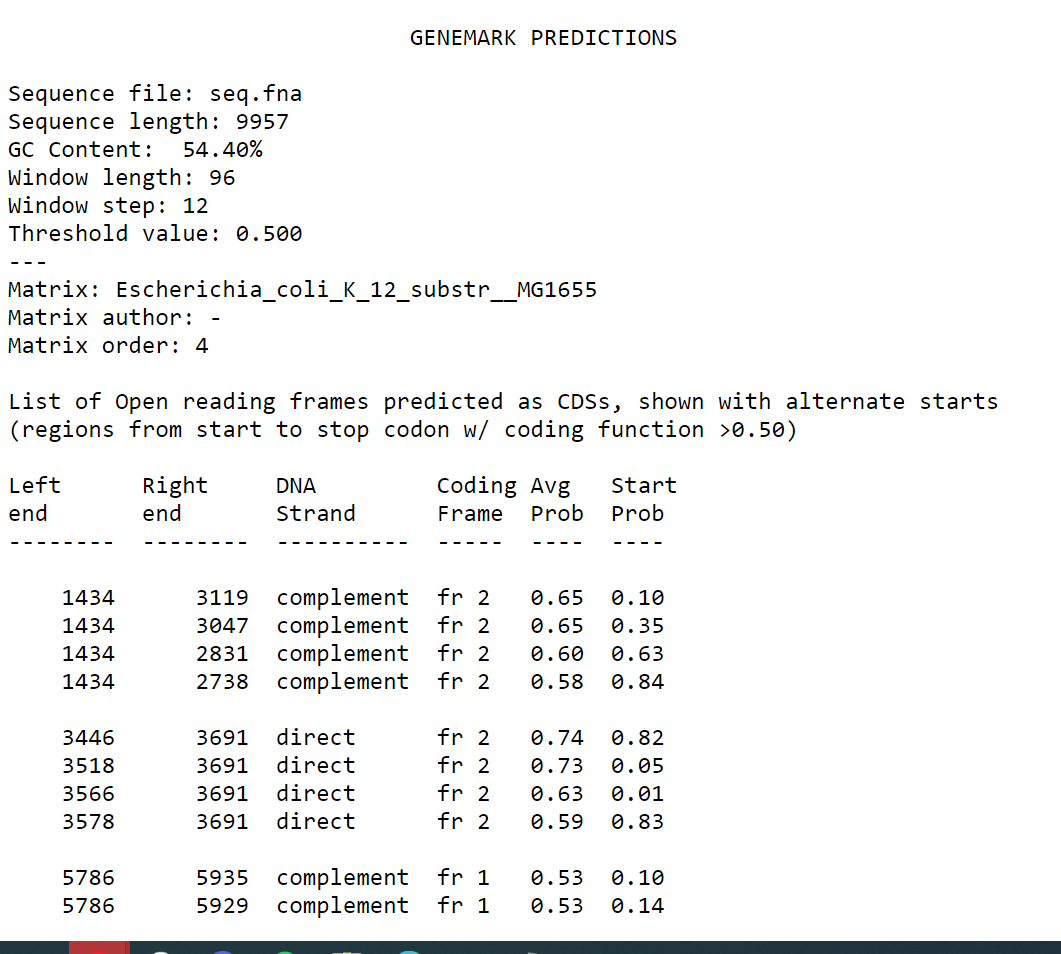

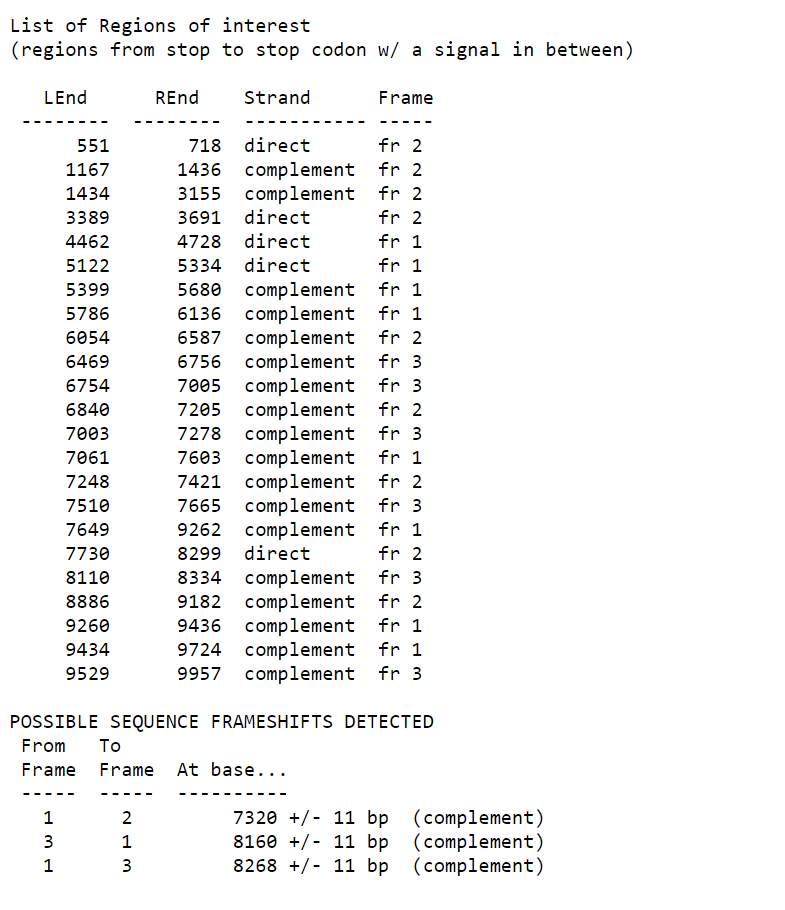